## 손실함수
### 로지스틱 손실 함수

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

In [78]:
# 시본 형태로 차트 변경
sns.set_style('darkgrid')

# 시본 사용시 한글깨짐 해결
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus':False}) 

In [79]:
# 예측확률값
y_hat = np.linspace(0.001,0.999,100)    # 0.001~0.999 사이 데이터 100개 생성
y_hat

array([0.001     , 0.01108081, 0.02116162, 0.03124242, 0.04132323,
       0.05140404, 0.06148485, 0.07156566, 0.08164646, 0.09172727,
       0.10180808, 0.11188889, 0.1219697 , 0.13205051, 0.14213131,
       0.15221212, 0.16229293, 0.17237374, 0.18245455, 0.19253535,
       0.20261616, 0.21269697, 0.22277778, 0.23285859, 0.24293939,
       0.2530202 , 0.26310101, 0.27318182, 0.28326263, 0.29334343,
       0.30342424, 0.31350505, 0.32358586, 0.33366667, 0.34374747,
       0.35382828, 0.36390909, 0.3739899 , 0.38407071, 0.39415152,
       0.40423232, 0.41431313, 0.42439394, 0.43447475, 0.44455556,
       0.45463636, 0.46471717, 0.47479798, 0.48487879, 0.4949596 ,
       0.5050404 , 0.51512121, 0.52520202, 0.53528283, 0.54536364,
       0.55544444, 0.56552525, 0.57560606, 0.58568687, 0.59576768,
       0.60584848, 0.61592929, 0.6260101 , 0.63609091, 0.64617172,
       0.65625253, 0.66633333, 0.67641414, 0.68649495, 0.69657576,
       0.70665657, 0.71673737, 0.72681818, 0.73689899, 0.74697

In [80]:
# 실제정답
y_true_1 = 1
y_true_0 = 0


In [81]:
# 로지스틱 손실함수 정의
def logistic_loss(y, y_hat) :
    return -(y * np.log(y_hat) + (1- y) * np.log(1-y_hat) )

In [82]:
# 손실값 계산
# 정답이 1일 때 손실함수
loss_1 = logistic_loss(y_true_1, y_hat)

# 정답이 0일 때 손실함수
loss_0 = logistic_loss(y_true_0, y_hat)

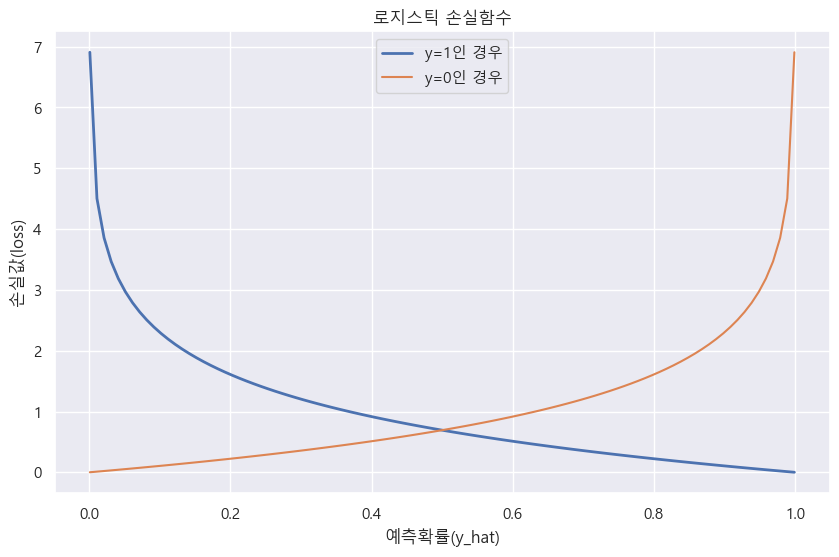

In [83]:
plt.figure(figsize= (10,6))
plt.plot(y_hat, loss_1, label = 'y=1인 경우', linewidth= 2)
plt.plot(y_hat, loss_0, label = 'y=0인 경우')
plt.xlabel('예측확률(y_hat)')
plt.ylabel('손실값(loss)')
plt.title('로지스틱 손실함수')
plt.legend()
plt.show()



## 확률적 경사하강법
#### SGD 실습
- 기존 데이터 로드

In [84]:
import pandas as pd

In [85]:
fish = pd.read_csv('https://bit.ly/fish_csv')     #인터넷을 통해서 다운로드 후 로드
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [86]:
fish_input = fish[['Weight',	'Length',	'Diagonal',	'Height',	'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

- 테스트세트, 훈련세트 분리

In [87]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(

        fish_input, fish_target, random_state=42
)

- 스케일링

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)


- 확률적 경사하강법 알고리즘 사용

In [89]:
from sklearn.linear_model import SGDClassifier



In [90]:
# 로지스틱 손실함수 사용
# 반복횟수 10으로 하면 ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit. (반복횟수 부족)
# random_state =42 
sc = SGDClassifier(loss='log_loss', max_iter=10 , random_state=42)
sc

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [91]:
sc.fit(train_scaled, train_target)

c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [92]:
sc.score(train_scaled, train_target)

0.773109243697479

In [93]:
sc.score(test_scaled, test_target)

0.775

- 반복횟수를 늘려서 다시 수행
- 반복횟수를 100으로 했을 때, sc.score(train_scaled, train_target) 은 0.8739495798319328
- 반복횟수를 1000으로 했을 때, 정확도가 개선되지 않음. 100과 차이 없음
- 적어도 40번은 반복할 것(반복횟수 40부터는 정확도 동일함 0.8739495798319328)

In [94]:
# random_state =42 
sc = SGDClassifier(loss='log_loss', max_iter=1000 , random_state=42)
sc

SGDClassifier(loss='log_loss', random_state=42)

In [95]:
sc.fit(train_scaled, train_target)

c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', random_state=42)

In [96]:
sc.score(train_scaled, train_target)

0.8739495798319328

In [97]:
sc.score(test_scaled, test_target)

0.8

#### 에포크 과대/과소 적합
- 에포크 : 반복횟수가 적으면 훈련세트 학습을 많이 못함
    - 에포크 수를 무조건 많이 한다고 최적값이 나오는 것도 아님

In [98]:
# 각 에포크마다 정확도 저장
sc2 = SGDClassifier(loss='log_loss' , random_state=42 )
train_score , test_score  = [] , []
classes = np.unique(train_target)


In [99]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [100]:
for _ in range(0,300):
    sc2.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc2.score(train_scaled, train_target))
    test_score.append(sc2.score(test_scaled, test_target))


c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array w

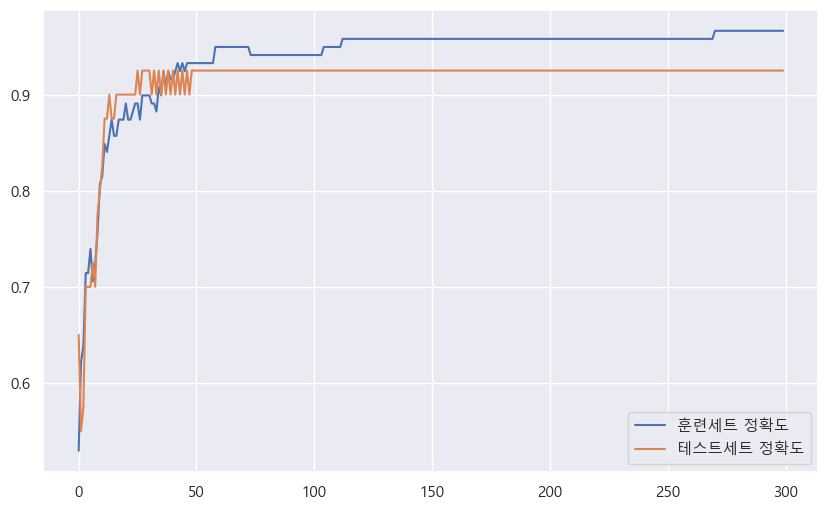

In [101]:
plt.figure(figsize = (10,6))
plt.plot(train_score, label='훈련세트 정확도')
plt.plot(test_score, label ='테스트세트 정확도')
plt.legend()
plt.show()

- 훈련세트는 300번 반복에 따라 정확도가 올라가지만 
- 테스트세트는 50번이상으로 올라가도 정확도가 변화없음


In [102]:
sc3 = SGDClassifier(loss='log_loss' , max_iter=70 ,random_state=42 )
sc3.fit(train_scaled, train_target)


c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', max_iter=70, random_state=42)

In [103]:
sc3.score(train_scaled, train_target)

0.8739495798319328

In [104]:
sc3.score(test_scaled, test_target)

0.8

- 조기종료

In [105]:
sc4 = SGDClassifier(loss='log_loss' , max_iter=300 ,random_state=42 , early_stopping=True, tol=1e-3)
sc4.fit(train_scaled, train_target)


c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(early_stopping=True, loss='log_loss', max_iter=300,
              random_state=42)

In [106]:
sc4.score(train_scaled, train_target)

0.7310924369747899

- SGDClassifier()함수의 기본 손실함수 hinge 손실함수

In [107]:
sc5 = SGDClassifier(loss='hinge', max_iter=100, random_state=42, tol=None)
sc5.fit(train_scaled, train_target)
sc5.score(train_scaled, train_target)


c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9495798319327731

In [108]:
sc5.score(test_scaled, test_target)

0.925

- 하이퍼파라미터 값을 적절히 변경해야 함
- sc5의 경우, 반복횟수 300보다 100일 때가 정확도 높다

In [109]:
sc5 = SGDClassifier(loss='hinge', max_iter=300, random_state=42, tol=None)
sc5.fit(train_scaled, train_target)
sc5.score(train_scaled, train_target)

c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8907563025210085

#### 결론
- `확률적 경사하강법` - 훈련세트에서 샘플 하나씩 꺼내 손실함수 경사에 따라 최적의 모델을 찾는 알고리즘
- `손실함수` - 확률적 경사하강법이 최적화할 대상
- `에포크` - 전체 샘플을 모두 사용하여 훈련한 반복횟수  
    - 반복을 많이 한다고 해서 결과가 좋아지는 것은 아님
    - loss, tol, early_stopping 등 하이퍼파라미터를 적절히 변경해야 함 